In [18]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
features=[  2  , 6 ,  5  , 3,  37 ,  7 ,  8 , 59 ,  0  , 9 , 10 , 11 , 12,  13 , 42 , 44 ,  1 , 60,
  46 , 21  ,78,  45  ,80,  82,  84 , 86,  88 , 90,  92 , 23,  71 , 41, 110 , 40, 108,  39,
  62 ,106 , 38 , 61 , 28 , 27 ,104,  43 , 19,  20 ,102,  22 , 67,  68 ,100,  24 , 25 ,109,
  65  ,66, 107  ,35,  36  ,29]
prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "1Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price.iloc[:,features])
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price.iloc[:,features])

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  148.8200   148.920000    148.92000  148.9200  148.886667   
2017-07-17 21:45:00  148.5700   149.315000    149.31500  149.7100  149.330000   
2017-07-17 22:00:00  149.6808   149.747333    150.16100  150.6120  150.330933   
2017-07-17 22:15:00  150.4202   149.965500    150.61600  150.6200  150.646733   
2017-07-17 22:30:00  150.1700   150.298275    150.43555  150.2511  150.363700   
2017-07-17 22:45:00  149.9000   150.433275    150.25055  150.2500  150.167500   
2017-07-17 23:00:00  149.9800   150.280275    150.12500  150.0000  150.120000   
2017-07-17 23:15:00  149.8000   150.125275    150.00000  150.0000  149.973333   
2017-07-17 23:30:00  149.9350   150.080000    150.03500  150.0700  150.051667   
2017-07-17 23:45:00  149.7700   149.985800    149.97160  149.8732  149.932733   
2017-07-18 00:00:00  149.5400   149.884250    149.73350  149.5938  149.707933   
2017-07-18 00:15:00  149.520

                           low  close_4_sma  close_2_sma      close  \
2017-07-17 21:30:00  1004.4300  1004.990000   1004.99000  1004.9900   
2017-07-17 21:45:00  1003.8100  1008.264600   1008.26460  1011.5392   
2017-07-17 22:00:00  1011.4500  1009.923067   1012.38960  1013.2400   
2017-07-17 22:15:00  1012.3800  1010.748200   1013.23180  1013.2236   
2017-07-17 22:30:00  1009.1900  1012.003200   1011.61680  1010.0100   
2017-07-17 22:45:00  1008.0000  1011.518400   1009.80500  1009.6000   
2017-07-17 23:00:00  1007.0100  1010.030400   1008.44400  1007.2880   
2017-07-17 23:15:00  1005.1900  1008.399500   1006.99400  1006.7000   
2017-07-17 23:30:00  1006.6400  1008.335750   1008.22750  1009.7550   
2017-07-17 23:45:00  1009.0200  1008.460750   1009.92750  1010.1000   
2017-07-18 00:00:00  1008.2900  1008.721250   1009.21500  1008.3300   
2017-07-18 00:15:00  1008.2900  1009.715325   1009.50315  1010.6763   
2017-07-18 00:30:00  1010.1500  1010.011575   1010.80815  1010.9400   
2017-0

                           low  close_4_sma  close_2_sma      close  \
2017-07-17 21:30:00   976.3200   978.340000    978.34000   978.3400   
2017-07-17 21:45:00   978.6000   979.553400    979.55340   980.7668   
2017-07-17 22:00:00   979.2700   980.452533    981.50880   982.2508   
2017-07-17 22:15:00   980.7700   980.561900    981.57040   980.8900   
2017-07-17 22:30:00   979.8300   981.076900    980.64500   980.4000   
2017-07-17 22:45:00   975.2200   980.197700    978.82500   977.2500   
2017-07-17 23:00:00   975.0100   978.467500    976.29000   975.3300   
2017-07-17 23:15:00   973.6400   977.090250    975.35550   975.3810   
2017-07-17 23:30:00   975.4300   976.087750    975.88550   976.3900   
2017-07-17 23:45:00   974.5300   975.646500    975.93750   975.4850   
2017-07-18 00:00:00   974.6300   975.651500    975.41750   975.3500   
2017-07-18 00:15:00   975.5000   975.963750    975.99000   976.6300   
2017-07-18 00:30:00   976.3700   976.213750    977.01000   977.3900   
2017-0

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  72.800    72.900000     72.90000  72.9000  72.866667   
2017-07-17 21:45:00  72.720    72.900000     72.90000  72.9000  72.863333   
2017-07-17 22:00:00  72.820    72.882533     72.87380  72.8476  72.872533   
2017-07-17 22:15:00  72.840    72.931875     72.96375  73.0799  73.004967   
2017-07-17 22:30:00  72.995    72.961875     73.04995  73.0200  73.081667   
2017-07-17 22:45:00  72.900    72.989375     73.01500  73.0100  72.996667   
2017-07-17 23:00:00  72.950    73.024975     73.00000  72.9900  72.996667   
2017-07-17 23:15:00  72.840    72.996250     72.97750  72.9650  72.951667   
2017-07-17 23:30:00  72.940    72.990000     72.98000  72.9950  72.988333   
2017-07-17 23:45:00  72.895    72.968750     72.96000  72.9250  72.946667   
2017-07-18 00:00:00  72.880    72.966000     72.95200  72.9790  72.948000   
2017-07-18 00:15:00  72.870    72.996000     73.03200  73.0850  73.015000   

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  160.2300   160.270000    160.27000  160.2700  160.266667   
2017-07-17 21:45:00  160.1000   160.360000    160.36000  160.4500  160.380000   
2017-07-17 22:00:00  160.3700   160.404600    160.47190  160.4938  160.537933   
2017-07-17 22:15:00  160.2900   160.377700    160.39540  160.2970  160.455667   
2017-07-17 22:30:00  159.7600   160.277700    160.08350  159.8700  159.986667   
2017-07-17 22:45:00  159.2100   160.035200    159.67500  159.4800  159.536667   
2017-07-17 23:00:00  158.9100   159.651750    159.22000  158.9600  159.116667   
2017-07-17 23:15:00  158.9000   159.345000    159.01500  159.0700  159.083333   
2017-07-17 23:30:00  159.0400   159.197075    159.17415  159.2783  159.307767   
2017-07-17 23:45:00  159.0400   159.132075    159.24915  159.2200  159.210000   
2017-07-18 00:00:00  159.1700   159.198325    159.22250  159.2250  159.281667   
2017-07-18 00:15:00  159.130

                         low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  34.6500    34.660000     34.66000  34.6600  34.683333   
2017-07-17 21:45:00  34.5300    34.610000     34.61000  34.5600  34.610000   
2017-07-17 22:00:00  34.4400    34.591667     34.55750  34.5550  34.528333   
2017-07-17 22:15:00  34.5000    34.598750     34.58750  34.6200  34.580000   
2017-07-17 22:30:00  34.5500    34.571250     34.58500  34.5500  34.573333   
2017-07-17 22:45:00  34.4500    34.556250     34.52500  34.5000  34.505000   
2017-07-17 23:00:00  34.4200    34.530000     34.47500  34.4500  34.463333   
2017-07-17 23:15:00  34.3600    34.470025     34.41505  34.3801  34.398367   
2017-07-17 23:30:00  34.3800    34.437525     34.40005  34.4200  34.408333   
2017-07-17 23:45:00  34.3700    34.411275     34.40750  34.3950  34.395000   
2017-07-18 00:00:00  34.3800    34.411275     34.42250  34.4500  34.426667   
2017-07-18 00:15:00  34.4300    34.431250     34.45500  34.4600 

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  31.500    31.515000     31.51500  31.5150  31.511667   
2017-07-17 21:45:00  31.450    31.520000     31.52000  31.5250  31.505000   
2017-07-17 22:00:00  31.510    31.550000     31.56750  31.6100  31.576667   
2017-07-17 22:15:00  31.530    31.562500     31.60500  31.6000  31.580000   
2017-07-17 22:30:00  31.580    31.583750     31.60000  31.6000  31.596667   
2017-07-17 22:45:00  31.590    31.607500     31.61000  31.6200  31.615000   
2017-07-17 23:00:00  31.570    31.598750     31.59750  31.5750  31.591667   
2017-07-17 23:15:00  31.540    31.585000     31.56000  31.5450  31.558333   
2017-07-17 23:30:00  31.535    31.573875     31.55025  31.5555  31.550167   
2017-07-17 23:45:00  31.500    31.545125     31.53025  31.5050  31.525000   
2017-07-18 00:00:00  31.480    31.535125     31.52000  31.5350  31.518333   
2017-07-18 00:15:00  31.530    31.537625     31.54500  31.5550  31.555000   

                         low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  39.1200    39.190000     39.19000  39.1900  39.166667   
2017-07-17 21:45:00  39.0942    39.175000     39.17500  39.1600  39.171400   
2017-07-17 22:00:00  39.1500    39.173333     39.16500  39.1700  39.183333   
2017-07-17 22:15:00  39.1600    39.182500     39.19000  39.2100  39.213300   
2017-07-17 22:30:00  39.1500    39.175000     39.18500  39.1600  39.185000   
2017-07-17 22:45:00  39.0600    39.176250     39.16250  39.1650  39.133333   
2017-07-17 23:00:00  39.0950    39.162500     39.14000  39.1150  39.128333   
2017-07-17 23:15:00  39.0900    39.140000     39.11750  39.1200  39.120000   
2017-07-17 23:30:00  39.1100    39.145000     39.15000  39.1800  39.156667   
2017-07-17 23:45:00  39.1400    39.141250     39.16500  39.1500  39.166667   
2017-07-18 00:00:00  39.1500    39.160000     39.17000  39.1900  39.186667   
2017-07-18 00:15:00  39.1801    39.180000     39.19500  39.2000 

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  166.2900   166.380000    166.38000  166.3800  166.356667   
2017-07-17 21:45:00  165.6000   166.402700    166.40270  166.4254  166.508467   
2017-07-17 22:00:00  165.0400   166.248467    166.18270  165.9400  165.960000   
2017-07-17 22:15:00  163.3000   165.701350    165.00000  164.0600  164.483333   
2017-07-17 22:30:00  163.1000   164.996350    163.81000  163.5600  163.716667   
2017-07-17 22:45:00  161.7500   163.987500    162.97500  162.3900  162.593333   
2017-07-17 23:00:00  162.3500   163.327500    162.84500  163.3000  163.170000   
2017-07-17 23:15:00  162.6400   163.125000    163.27500  163.2500  163.150000   
2017-07-17 23:30:00  162.6800   163.000775    163.15655  163.0631  163.131033   
2017-07-17 23:45:00  162.4300   163.115775    162.95655  162.8500  162.810000   
2017-07-18 00:00:00  162.6600   163.144525    163.13250  163.4150  163.214967   
2017-07-18 00:15:00  163.040

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  162.9100   162.920000    162.92000  162.9200  162.950000   
2017-07-17 21:45:00  162.0300   162.782500    162.78250  162.6450  162.741667   
2017-07-17 22:00:00  162.1100   162.778333    162.70750  162.7700  162.621000   
2017-07-17 22:15:00  161.5100   162.486250    162.19000  161.6100  162.103333   
2017-07-17 22:30:00  161.1600   162.073750    161.44000  161.2700  161.500167   
2017-07-17 22:45:00  160.2500   161.772500    161.35500  161.4400  161.060000   
2017-07-17 23:00:00  160.9610   161.478750    161.51750  161.5950  161.518667   
2017-07-17 23:15:00  160.7400   161.337675    161.32035  161.0457  161.115233   
2017-07-17 23:30:00  160.5100   161.165175    160.81285  160.5800  160.733333   
2017-07-17 23:45:00  160.0201   160.869925    160.41950  160.2590  160.356367   
2017-07-18 00:00:00  160.1600   160.604175    160.39550  160.5320  160.510667   
2017-07-18 00:15:00  160.430

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  146.1600   146.160000    146.16000  146.1600  146.160000   
2017-07-17 21:45:00  145.5900   145.927500    145.92750  145.6950  145.925000   
2017-07-17 22:00:00  145.6000   145.831667    145.66750  145.6400  145.750000   
2017-07-17 22:15:00  145.4800   145.758750    145.59000  145.5400  145.616667   
2017-07-17 22:30:00  145.5200   145.681250    145.69500  145.8500  145.850000   
2017-07-17 22:45:00  145.3900   145.657500    145.72500  145.6000  145.623333   
2017-07-17 23:00:00  145.4700   145.672500    145.65000  145.7000  145.643333   
2017-07-17 23:15:00  145.4100   145.680000    145.63500  145.5700  145.586667   
2017-07-17 23:30:00  145.5700   145.657500    145.66500  145.7600  145.713333   
2017-07-17 23:45:00  145.5600   145.649200    145.66340  145.5668  145.652267   
2017-07-18 00:00:00  145.4200   145.626700    145.58840  145.6100  145.598333   
2017-07-18 00:15:00  145.580

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  176.8400   176.840000    176.84000  176.8400  176.840000   
2017-07-17 21:45:00  176.6800   177.235000    177.23500  177.6300  177.313333   
2017-07-17 22:00:00  177.6275   177.443333    177.74500  177.8600  177.852500   
2017-07-17 22:15:00  177.5900   177.565000    177.89500  177.9300  177.853333   
2017-07-17 22:30:00  177.5100   177.825000    177.90500  177.8800  177.803333   
2017-07-17 22:45:00  177.7057   177.887500    177.88000  177.8800  177.958567   
2017-07-17 23:00:00  177.7600   177.935000    177.96500  178.0500  178.040000   
2017-07-17 23:15:00  177.9800   178.026250    178.17250  178.2950  178.198333   
2017-07-17 23:30:00  178.2300   178.236250    178.50750  178.7200  178.576667   
2017-07-17 23:45:00  178.5900   178.433750    178.69500  178.6700  178.670000   
2017-07-18 00:00:00  178.6000   178.596250    178.68500  178.7000  178.685000   
2017-07-18 00:15:00  178.650

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00   81.8100    82.000000     82.00000   82.0000   81.936667   
2017-07-17 21:45:00   81.4800    81.810000     81.81000   81.6200   81.690000   
2017-07-17 22:00:00   81.5450    81.748333     81.62250   81.6250   81.623333   
2017-07-17 22:15:00   81.5400    81.746250     81.68250   81.7400   81.673333   
2017-07-17 22:30:00   81.7350    81.713750     81.80500   81.8700   81.861667   
2017-07-17 22:45:00   81.6200    81.716250     81.75000   81.6300   81.716667   
2017-07-17 23:00:00   81.6000    81.730000     81.65500   81.6800   81.673333   
2017-07-17 23:15:00   81.5100    81.702500     81.65500   81.6300   81.616667   
2017-07-17 23:30:00   81.6300    81.660000     81.66500   81.7000   81.703333   
2017-07-17 23:45:00   81.5800    81.650000     81.64500   81.5900   81.630000   
2017-07-18 00:00:00   81.5600    81.652500     81.64000   81.6900   81.673333   
2017-07-18 00:15:00   81.660

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  250.7900   250.790000    250.79000  250.7900  250.860000   
2017-07-17 21:45:00  250.7100   251.125000    251.12500  251.4600  251.510000   
2017-07-17 22:00:00  251.1000   251.243333    251.47000  251.4800  251.526667   
2017-07-17 22:15:00  250.9300   251.272500    251.42000  251.3600  251.293333   
2017-07-17 22:30:00  251.0300   251.347500    251.22500  251.0900  251.243333   
2017-07-17 22:45:00  250.2900   251.120000    250.82000  250.5500  250.693367   
2017-07-17 23:00:00  250.0000   250.869975    250.51495  250.4799  250.523300   
2017-07-17 23:15:00  250.0550   250.603725    250.38745  250.2950  250.386667   
2017-07-17 23:30:00  249.8100   250.293725    250.07250  249.8500  250.090000   
2017-07-17 23:45:00  249.6600   250.101225    249.81500  249.7800  249.840000   
2017-07-18 00:00:00  249.7000   250.068750    250.06500  250.3500  250.236667   
2017-07-18 00:15:00  249.890

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  57.530    57.530000     57.53000  57.5300  57.530000   
2017-07-17 21:45:00  57.100    57.435000     57.43500  57.3400  57.340000   
2017-07-17 22:00:00  57.150    57.373333     57.29500  57.2500  57.276667   
2017-07-17 22:15:00  57.150    57.317500     57.20000  57.1500  57.230000   
2017-07-17 22:30:00  57.130    57.272500     57.25000  57.3500  57.315000   
2017-07-17 22:45:00  57.150    57.260000     57.32000  57.2900  57.280000   
2017-07-17 23:00:00  57.205    57.270000     57.29000  57.2900  57.288333   
2017-07-17 23:15:00  57.110    57.278750     57.23750  57.1850  57.221667   
2017-07-17 23:30:00  57.080    57.223750     57.15750  57.1300  57.136667   
2017-07-17 23:45:00  57.020    57.178750     57.12000  57.1100  57.100000   
2017-07-18 00:00:00  57.085    57.144000     57.13050  57.1510  57.145667   
2017-07-18 00:15:00  57.160    57.150275     57.18055  57.2101  57.203367   

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  70.580    70.610000      70.6100  70.6100  70.600000   
2017-07-17 21:45:00  70.400    70.775000      70.7750  70.9400  70.766667   
2017-07-17 22:00:00  70.900    70.896667      71.0400  71.1400  71.086667   
2017-07-17 22:15:00  71.130    70.985000      71.1950  71.2500  71.213333   
2017-07-17 22:30:00  71.135    71.145000      71.2500  71.2500  71.215000   
2017-07-17 22:45:00  71.230    71.246250      71.2975  71.3450  71.311667   
2017-07-17 23:00:00  71.285    71.313750      71.3775  71.4100  71.381667   
2017-07-17 23:15:00  71.410    71.386250      71.4750  71.5400  71.553333   
2017-07-17 23:30:00  71.440    71.483750      71.5900  71.6400  71.586667   
2017-07-17 23:45:00  71.590    71.572500      71.6700  71.7000  71.693333   
2017-07-18 00:00:00  71.685    71.655000      71.7200  71.7400  71.728333   
2017-07-18 00:15:00  71.691    71.730000      71.7900  71.8400  71.793667   

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  152.9700   152.970000    152.97000  152.9700  152.980000   
2017-07-17 21:45:00  153.0000   153.090000    153.09000  153.2100  153.216667   
2017-07-17 22:00:00  152.8100   153.033333    153.06500  152.9200  152.986667   
2017-07-17 22:15:00  152.8800   153.050000    153.01000  153.1000  153.051667   
2017-07-17 22:30:00  152.9300   153.052500    153.04000  152.9800  153.020000   
2017-07-17 22:45:00  152.7900   153.061250    153.11250  153.2450  153.103333   
2017-07-17 23:00:00  153.0600   153.118750    153.19750  153.1500  153.153333   
2017-07-17 23:15:00  153.0300   153.128750    153.14500  153.1400  153.110000   
2017-07-17 23:30:00  152.9500   153.156250    153.11500  153.0900  153.056667   
2017-07-17 23:45:00  152.9700   153.092500    153.04000  152.9900  153.026667   
2017-07-18 00:00:00  152.5200   152.995000    152.87500  152.7600  152.758333   
2017-07-18 00:15:00  152.710

                         low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  56.7200    56.790000     56.79000  56.7900  56.773333   
2017-07-17 21:45:00  56.6000    56.780000     56.78000  56.7700  56.730000   
2017-07-17 22:00:00  56.7650    56.802333     56.80850  56.8470  56.829667   
2017-07-17 22:15:00  56.8000    56.821750     56.86350  56.8800  56.866667   
2017-07-17 22:30:00  56.7100    56.801750     56.79500  56.7100  56.768133   
2017-07-17 22:45:00  56.5850    56.766750     56.67000  56.6300  56.645000   
2017-07-17 23:00:00  56.5500    56.701250     56.60750  56.5850  56.601667   
2017-07-17 23:15:00  56.4500    56.626250     56.58250  56.5800  56.543333   
2017-07-17 23:30:00  56.5200    56.608750     56.61000  56.6400  56.613333   
2017-07-17 23:45:00  56.5150    56.581250     56.58000  56.5200  56.571667   
2017-07-18 00:00:00  56.4663    56.552500     56.49500  56.4700  56.492100   
2017-07-18 00:15:00  56.4700    56.555000     56.53000  56.5900 

In [ ]:
low              145.440000
close_4_sma      145.500000
close_2_sma      145.500000
close            145.500000
middle           145.520000
close_6_sma      145.500000
close_8_sma      145.500000
close_12_ema     145.500000
open             145.500000
close_10_sma     145.500000
close_12_sma     145.500000
close_14_sma     145.500000
close_16_sma     145.500000
close_18_sma     145.500000
close_20_sma     145.500000
boll             145.500000
high             145.620000
close_26_ema     145.500000
boll_lb                 NaN
close_-1_s              NaN
close_-2_s              NaN
boll_ub                 NaN
close_-4_s              NaN
close_-6_s              NaN
close_-8_s              NaN
close_-10_s             NaN
close_-12_s             NaN
close_-14_s             NaN
close_-16_s             NaN
atr_14                  NaN
atr                     NaN
cr-ma3                  NaN
rsi_16                  NaN
cr-ma2                  NaN
rsi_14                  NaN
cr-ma1                  NaN
macds              0.000000
rsi_12                  NaN
cr                      NaN
macd               0.000000
mdm_14             0.000000
mdm_14_ema         0.000000
rsi_10                  NaN
close_20_mstd           NaN
pdm_14_ema         0.000000
pdm_14             0.000000
rsi_8                   NaN
tr                      NaN
kdjd_9            48.148148
kdjd              48.148148
rsi_6                   NaN
pdi_14                  NaN
pdi                     NaN
rs_16                   NaN
kdjk_9            44.444444
kdjk              44.444444
rs_14                   NaN
adx_6_ema               NaN
adxr                    NaN
mdi_14                  NaN
Name: 2017-07-13 21:30:00, dtype: float64

In [19]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u

Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 1
[[257 299]
 [303 306]]
F1,score 0.5041186161449753
Accuracy: 0.4832618025751073
1000.0
Window: 5
[[266 285]
 [278 335]]
F1,score 0.543390105433901
Accuracy: 0.5163230240549829
31.622776601683793
Window: 25
[[378 131]
 [507 144]]
F1,score 0.31101511879049676
Accuracy: 0.45
0.005994842503189409
Window: 40
[[477   0]
 [674   6]]
F1,score 0.01749271137026239
Accuracy: 0.41745894554883317
0.3593813663804626
Window: 80
[[441  22]
 [606  80]]
F1,score 0.20304568527918782
Accuracy: 0.453437771975631
1.637893706954064
Window: 115
[[389  67]
 [348 338]]
F1,score 0.6196150320806599
Accuracy: 0.6366024518388792
1.637893706954064
Window: 145
[[381  80]
 [306 369]]
F1,score 0.6565836298932385
Accuracy: 0.6602112676056338
1.0
Window: 170
[[410  38]
 [292 391]]
F1,score 0.7032374100719424
Accuracy: 0.7082228116710876
7.196856730011519
Window: 200
[[396  52]
 [202 475]]
F1,score 0.7890365448504983
Accuracy: 0.7742222222222223
2.782559402207126
Window: 250
[[411  33]
 [224 447]]
F1,sco

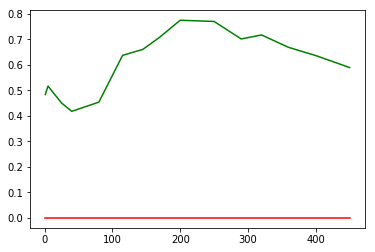

Working on... AMZN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


21.54434690031882
Window: 1
[[395 183]
 [370 217]]
F1,score 0.4397163120567376
Accuracy: 0.5253218884120172
4.39397056076079
Window: 5
[[421 148]
 [396 199]]
F1,score 0.42250530785562623
Accuracy: 0.5326460481099656
0.0001
Window: 25
[[258 283]
 [311 308]]
F1,score 0.5090909090909091
Accuracy: 0.4879310344827586
11.787686347935873
Window: 40
[[206 344]
 [153 454]]
F1,score 0.6462633451957296
Accuracy: 0.5704407951598963
84.83428982440716
Window: 80
[[296 185]
 [301 367]]
F1,score 0.6016393442622952
Accuracy: 0.577023498694517
138.94954943731375
Window: 115
[[421  50]
 [422 249]]
F1,score 0.51340206185567
Accuracy: 0.5866900175131349
10000.0
Window: 145
[[363  69]
 [277 427]]
F1,score 0.7116666666666668
Accuracy: 0.6954225352112676
610.5402296585327
Window: 170
[[318 127]
 [302 384]]
F1,score 0.6416040100250626
Accuracy: 0.6206896551724138
84.83428982440716
Window: 200
[[278 160]
 [205 482]]
F1,score 0.7253574115876599
Accuracy: 0.6755555555555556
51.7947467923121
Window: 250
[[151 287]

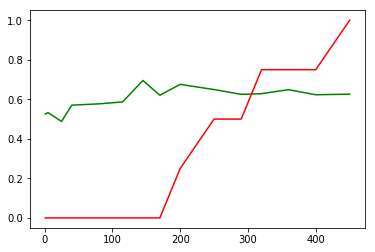

Working on... GOOGL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.005994842503189409
Window: 1
[[383 177]
 [384 221]]
F1,score 0.44067796610169496
Accuracy: 0.5184549356223176
10000.0
Window: 5
[[145 434]
 [119 466]]
F1,score 0.6276094276094276
Accuracy: 0.5249140893470791
51.7947467923121
Window: 25
[[257 284]
 [293 326]]
F1,score 0.530512611879577
Accuracy: 0.5025862068965518
166.81005372000558
Window: 40
[[194 345]
 [164 454]]
F1,score 0.6407904022582922
Accuracy: 0.5600691443388073
10000.0
Window: 80
[[146 387]
 [ 92 524]]
F1,score 0.6863130320890635
Accuracy: 0.5831157528285466
10000.0
Window: 115
[[128 429]
 [ 51 534]]
F1,score 0.6899224806201549
Accuracy: 0.5796847635726795
10000.0
Window: 145
[[124 423]
 [ 18 571]]
F1,score 0.7214150347441567
Accuracy: 0.6117957746478874
10000.0
Window: 170
[[104 438]
 [ 29 560]]
F1,score 0.7057340894770007
Accuracy: 0.5870910698496905
2.6826957952797255
Window: 200
[[237 302]
 [ 81 505]]
F1,score 0.7250538406317302
Accuracy: 0.6595555555555556
1.0
Window: 250
[[234 287]
 [163 431]]
F1,score 0.6570121951219

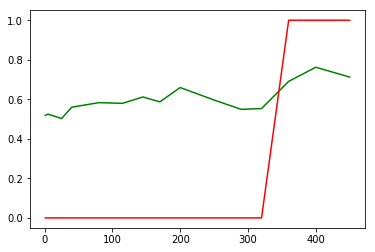

Working on... MSFT
1000.0
Window: 1
[[431 132]
 [468 134]]
F1,score 0.30875576036866353
Accuracy: 0.48497854077253216
1000.0
Window: 5
[[353 182]
 [374 255]]
F1,score 0.4784240150093808
Accuracy: 0.5223367697594502
4.39397056076079
Window: 25
[[227 259]
 [243 431]]
F1,score 0.6319648093841642
Accuracy: 0.5672413793103448
0.000774263682681127
Window: 40
[[352 119]
 [381 305]]
F1,score 0.5495495495495495
Accuracy: 0.567847882454624
0.0001
Window: 80
[[441   9]
 [658  41]]
F1,score 0.10947930574098798
Accuracy: 0.4194952132288947
0.3593813663804626
Window: 115
[[373   0]
 [769   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.3266199649737303
0.046415888336127774
Window: 145
[[376   0]
 [760   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.33098591549295775
84.83428982440716
Window: 170
[[386  39]
 [551 155]]
F1,score 0.34444444444444444
Accuracy: 0.47833775419982316
1.0
Window: 200
[[368  41]
 [489 227]]
F1,score 0.46138211382113825
Accuracy: 0.5288888888888889
0.000774263682681127
Window: 250
[[261  91]
 [499 264]]
F1,score 0.4722719141323793
Accuracy: 0.47085201793721976
0.3593813663804626
Window: 290
[[296  60]
 [501 250]]
F1,score 0.471253534401508
Accuracy: 0.4932249322493225
0.000774263682681127
Window: 320
[[300  39]
 [593 169]]
F1,score 0.34845360824742266
Accuracy: 0.4259763851044505
10000.0
Window: 360
[[334  15]
 [401 343]]
F1,score 0.6225045372050816
Accuracy: 0.6193961573650503
0.005994842503189409
Window: 400
[[252  53]
 [588 192]]
F1,score 0.37463414634146336
Accuracy: 0.40921658986175113
0.046415888336127774
Window: 450
[[217  40]
 [627 191]]
F1,score 0.3641563393708294
Accuracy: 0.37953488372093025
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 25]
[0.48497854077253216, 0.5223367

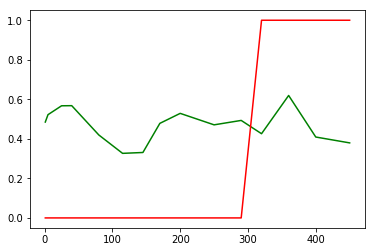

Working on... FB


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


1.637893706954064
Window: 1
[[286 292]
 [267 320]]
F1,score 0.5337781484570476
Accuracy: 0.5201716738197425
2.782559402207126
Window: 5
[[248 327]
 [217 372]]
F1,score 0.577639751552795
Accuracy: 0.5326460481099656
372.7593720314938
Window: 25
[[225 309]
 [208 418]]
F1,score 0.6178861788617886
Accuracy: 0.5543103448275862
31.622776601683793
Window: 40
[[146 366]
 [214 431]]
F1,score 0.5977808599167822
Accuracy: 0.49870354364736386
2.6826957952797255
Window: 80
[[120 261]
 [233 535]]
F1,score 0.6841432225063939
Accuracy: 0.5700609225413403
2.6826957952797255
Window: 115
[[107 236]
 [218 581]]
F1,score 0.719059405940594
Accuracy: 0.6024518388791593
1.637893706954064
Window: 145
[[101 245]
 [178 612]]
F1,score 0.7431693989071039
Accuracy: 0.6276408450704225
84.83428982440716
Window: 170
[[ 84 231]
 [119 697]]
F1,score 0.7993119266055045
Accuracy: 0.6905393457117595
610.5402296585327
Window: 200
[[103 203]
 [105 714]]
F1,score 0.8225806451612903
Accuracy: 0.7262222222222222
1.0
Window: 250

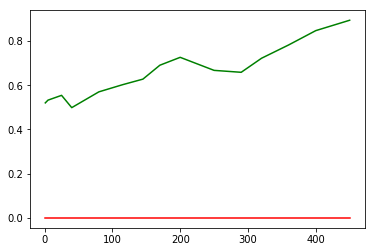

Working on... INTC
4.39397056076079
Window: 1
[[553   2]
 [609   1]]
F1,score 0.0032626427406199027
Accuracy: 0.4755364806866953
227.58459260747887
Window: 5
[[494  46]
 [565  59]]
F1,score 0.16186556927297668
Accuracy: 0.47508591065292094
2.782559402207126
Window: 25
[[453   2]
 [681  24]]
F1,score 0.06566347469220246
Accuracy: 0.41120689655172415
1000.0
Window: 40
[[411  35]
 [627  84]]
F1,score 0.20240963855421687
Accuracy: 0.4278305963699222
0.000774263682681127
Window: 80
[[453   0]
 [696   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.39425587467362927
1.0
Window: 115
[[428   0]
 [712   2]]
F1,score 0.00558659217877095
Accuracy: 0.37653239929947463
1.0
Window: 145
[[443   0]
 [688   5]]
F1,score 0.014326647564469913
Accuracy: 0.39436619718309857
0.005994842503189409
Window: 170
[[431   0]
 [700   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.381078691423519
0.005994842503189409
Window: 200
[[432   0]
 [693   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.384
10000.0
Window: 250
[[317  52]
 [385 361]]
F1,score 0.6229508196721312
Accuracy: 0.6080717488789238
84.83428982440716
Window: 290
[[338   0]
 [578 191]]
F1,score 0.39791666666666664
Accuracy: 0.4778681120144535
51.7947467923121
Window: 320
[[315   0]
 [624 162]]
F1,score 0.34177215189873417
Accuracy: 0.4332425068119891
84.83428982440716
Window: 360
[[359   0]
 [552 182]]
F1,score 0.39737991266375544
Accuracy: 0.494967978042086
10000.0
Window: 400
[[272  18]
 [446 349]]
F1,score 0.6006884681583478
Accuracy: 0.5723502304147465
31.622776601683793
Window: 450
[[243   0]
 [666 166]]
F1,score 0.33266533066132264
Accuracy: 0.38046511627906976
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.4755364806866953, 0.47508591065292094, 0.41120689655172415, 0.4278305963699222, 0.39425587467362927, 0.37653239929947463, 0.39436619718309857, 0.381078691423519, 0.384, 0.6080717488789238, 0.4778681120144535, 0.4332425068119891, 0.494967978042086, 0.5723502304147465, 0.38046511

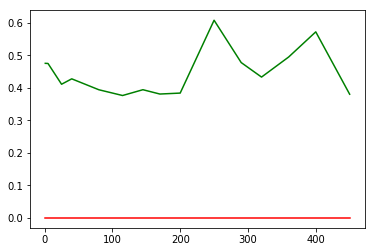

Working on... CSCO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 1
[[395 168]
 [391 211]]
F1,score 0.43017329255861364
Accuracy: 0.5201716738197425
610.5402296585327
Window: 5
[[368 181]
 [405 210]]
F1,score 0.41749502982107356
Accuracy: 0.4965635738831615
1.637893706954064
Window: 25
[[524  19]
 [586  31]]
F1,score 0.09295352323838081
Accuracy: 0.47844827586206895
11.787686347935873
Window: 40
[[439 111]
 [373 234]]
F1,score 0.4915966386554622
Accuracy: 0.581676750216076
2.782559402207126
Window: 80
[[512  22]
 [561  54]]
F1,score 0.15629522431259044
Accuracy: 0.4926022628372498
11.787686347935873
Window: 115
[[441  89]
 [437 175]]
F1,score 0.39954337899543374
Accuracy: 0.5394045534150613
2.6826957952797255
Window: 145
[[425 102]
 [347 262]]
F1,score 0.5385405960945528
Accuracy: 0.6047535211267606
2.6826957952797255
Window: 170
[[415 136]
 [216 364]]
F1,score 0.6740740740740742
Accuracy: 0.6887709991158267
1.0
Window: 200
[[286 226]
 [215 398]]
F1,score 0.6434923201293451
Accuracy: 0.608
4.39397056076079
Window: 250
[[289 211]
 [135

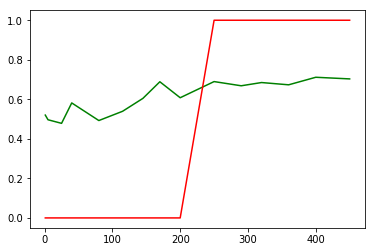

Working on... CMCSA
138.94954943731375
Window: 1
[[507  70]
 [533  55]]
F1,score 0.15427769985974757
Accuracy: 0.48240343347639486
1.0
Window: 5
[[472 104]
 [452 136]]
F1,score 0.3285024154589372
Accuracy: 0.5223367697594502
7.196856730011519
Window: 25
[[204 390]
 [214 352]]
F1,score 0.5382262996941896
Accuracy: 0.4793103448275862
0.3593813663804626
Window: 40
[[112 481]
 [ 74 490]]
F1,score 0.6384364820846905
Accuracy: 0.5203111495246326
0.000774263682681127
Window: 80
[[133 472]
 [ 68 476]]
F1,score 0.6380697050938339
Accuracy: 0.5300261096605744
0.3593813663804626
Window: 115
[[ 78 510]
 [ 38 516]]
F1,score 0.6531645569620254
Accuracy: 0.5201401050788091
0.046415888336127774
Window: 145
[[130 461]
 [100 445]]
F1,score 0.6133700895933839
Accuracy: 0.5061619718309859
0.3593813663804626
Window: 170
[[ 80 589]
 [ 68 394]]
F1,score 0.5453287197231834
Accuracy: 0.41909814323607425
0.0001
Window: 200
[[133 537]
 [ 90 365]]
F1,score 0.5379513633014001
Accuracy: 0.44266666666666665
0.359381

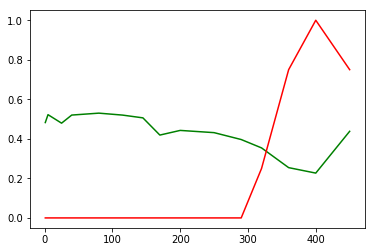

Working on... NVDA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


7.196856730011519
Window: 1
[[401 159]
 [394 211]]
F1,score 0.4328205128205128
Accuracy: 0.5253218884120172
4.39397056076079
Window: 5
[[451 100]
 [450 163]]
F1,score 0.3721461187214612
Accuracy: 0.5274914089347079
1.0
Window: 25
[[427  78]
 [478 177]]
F1,score 0.38901098901098896
Accuracy: 0.5206896551724138
0.0001
Window: 40
[[509   2]
 [614  32]]
F1,score 0.09411764705882354
Accuracy: 0.4675885911840968
0.005994842503189409
Window: 80
[[532   8]
 [552  57]]
F1,score 0.16913946587537093
Accuracy: 0.5126196692776327
0.005994842503189409
Window: 115
[[613   0]
 [529   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.5367775831873906
7.196856730011519
Window: 145
[[571  65]
 [151 349]]
F1,score 0.7636761487964989
Accuracy: 0.8098591549295775
0.3593813663804626
Window: 170
[[631   0]
 [499   1]]
F1,score 0.003992015968063872
Accuracy: 0.5587975243147657
4.39397056076079
Window: 200
[[568  32]
 [214 311]]
F1,score 0.716589861751152
Accuracy: 0.7813333333333333
0.3593813663804626
Window: 250
[[590   0]
 [390 135]]
F1,score 0.40909090909090906
Accuracy: 0.6502242152466368
10000.0
Window: 290
[[416 153]
 [212 326]]
F1,score 0.6411012782694199
Accuracy: 0.6702800361336947
10000.0
Window: 320
[[404 154]
 [306 237]]
F1,score 0.5074946466809422
Accuracy: 0.5821980018165305
21.54434690031882
Window: 360
[[437  55]
 [411 190]]
F1,score 0.4491725768321513
Accuracy: 0.5736505032021958
166.81005372000558
Window: 400
[[349 152]
 [290 294]]
F1,score 0.570873786407767
Accuracy: 0.5926267281105991
1291.5496650148827
Window: 450
[[309 161]
 [297 308]]
F1,score 0.5735567970204841
Accuracy: 0.5

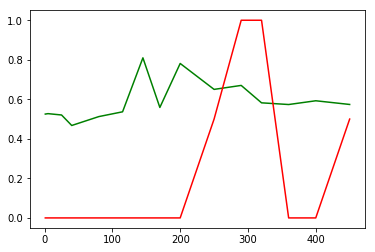

Working on... NFLX
0.000774263682681127
Window: 1
[[  0 584]
 [  0 581]]
F1,score 0.6655211912943872
Accuracy: 0.49871244635193135
51.7947467923121
Window: 5
[[326 253]
 [329 256]]
F1,score 0.4680073126142596
Accuracy: 0.5
166.81005372000558
Window: 25
[[339 195]
 [423 203]]
F1,score 0.396484375
Accuracy: 0.4672413793103448
138.94954943731375
Window: 40
[[308 179]
 [423 247]]
F1,score 0.4507299270072993
Accuracy: 0.47968885047536736
372.7593720314938
Window: 80
[[260 194]
 [393 302]]
F1,score 0.5071368597816961
Accuracy: 0.48912097476066146
1291.5496650148827
Window: 115
[[338 101]
 [475 228]]
F1,score 0.4418604651162791
Accuracy: 0.4956217162872154
51.7947467923121
Window: 145
[[384  34]
 [465 253]]
F1,score 0.5034825870646766
Accuracy: 0.5607394366197183
21.54434690031882
Window: 170
[[389  37]
 [429 276]]
F1,score 0.5422396856581533
Accuracy: 0.5879752431476569
10000.0
Window: 200
[[346 107]
 [318 354]]
F1,score 0.6248896734333628
Accuracy: 0.6222222222222222
10000.0
Window: 250
[[3

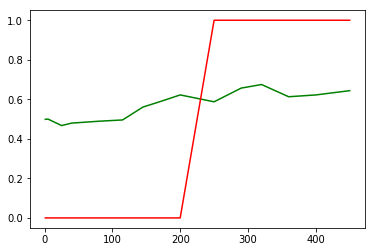

Working on... ADBE
11.787686347935873
Window: 1
[[358 181]
 [433 193]]
F1,score 0.38599999999999995
Accuracy: 0.47296137339055794
1.637893706954064
Window: 5
[[391 130]
 [529 114]]
F1,score 0.2570462232243517
Accuracy: 0.4338487972508591
4.39397056076079
Window: 25
[[433   3]
 [720   4]]
F1,score 0.01094391244870041
Accuracy: 0.3767241379310345
1.0
Window: 40
[[357  71]
 [510 219]]
F1,score 0.42983316977428854
Accuracy: 0.4978392394122731
0.046415888336127774
Window: 80
[[ 87 325]
 [102 635]]
F1,score 0.7483794932233352
Accuracy: 0.6283724978241949
0.005994842503189409
Window: 115
[[342  92]
 [594 114]]
F1,score 0.24945295404814
Accuracy: 0.39929947460595444
1.0
Window: 145
[[  4 419]
 [ 20 693]]
F1,score 0.7594520547945206
Accuracy: 0.613556338028169
1.0
Window: 170
[[  4 459]
 [ 11 657]]
F1,score 0.7365470852017937
Accuracy: 0.5844385499557914
7.196856730011519
Window: 200
[[ 23 456]
 [ 10 636]]
F1,score 0.7318757192174915
Accuracy: 0.5857777777777777
7.196856730011519
Window: 250
[[

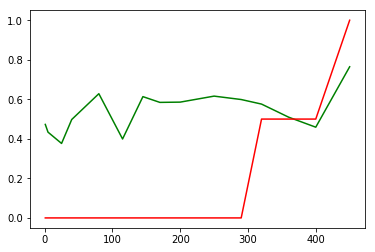

Working on... AMGN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


138.94954943731375
Window: 1
[[128 451]
 [140 446]]
F1,score 0.6014834794335806
Accuracy: 0.4927038626609442
19.306977288832496
Window: 5
[[ 78 502]
 [ 99 485]]
F1,score 0.617441120305538
Accuracy: 0.4836769759450172
51.7947467923121
Window: 25
[[ 31 499]
 [ 24 606]]
F1,score 0.6985590778097984
Accuracy: 0.5491379310344827
1.0
Window: 40
[[ 38 450]
 [  2 667]]
F1,score 0.7469204927211646
Accuracy: 0.6093344857389801
1.0
Window: 80
[[ 54 433]
 [  7 655]]
F1,score 0.7485714285714286
Accuracy: 0.6170583115752829
1.0
Window: 115
[[ 58 382]
 [  0 702]]
F1,score 0.786114221724524
Accuracy: 0.6654991243432574
1.637893706954064
Window: 145
[[ 97 409]
 [  0 630]]
F1,score 0.7549430796884362
Accuracy: 0.6399647887323944
1.0
Window: 170
[[106 388]
 [  0 637]]
F1,score 0.766546329723225
Accuracy: 0.6569407603890363
0.000774263682681127
Window: 200
[[ 38 432]
 [  0 655]]
F1,score 0.7520091848450057
Accuracy: 0.616
0.005994842503189409
Window: 250
[[ 99 429]
 [ 26 561]]
F1,score 0.7114774889029802
A

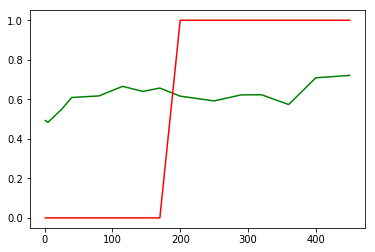

Working on... TXN
1291.5496650148827
Window: 1
[[373 203]
 [412 177]]
F1,score 0.3653250773993808
Accuracy: 0.4721030042918455
11.787686347935873
Window: 5
[[363 159]
 [395 247]]
F1,score 0.4713740458015267
Accuracy: 0.5240549828178694
10000.0
Window: 25
[[306 179]
 [480 195]]
F1,score 0.37178265014299333
Accuracy: 0.43189655172413793
31.622776601683793
Window: 40
[[343 135]
 [476 203]]
F1,score 0.39921337266470014
Accuracy: 0.47191011235955055
166.81005372000558
Window: 80
[[285 168]
 [284 412]]
F1,score 0.6457680250783698
Accuracy: 0.6066144473455178
138.94954943731375
Window: 115
[[167 252]
 [176 547]]
F1,score 0.7187910643889619
Accuracy: 0.6252189141856392
227.58459260747887
Window: 145
[[190 260]
 [ 90 596]]
F1,score 0.7730220492866408
Accuracy: 0.6919014084507042
138.94954943731375
Window: 170
[[170 292]
 [103 566]]
F1,score 0.7413228552717747
Accuracy: 0.6507515473032714
372.7593720314938
Window: 200
[[169 311]
 [ 98 547]]
F1,score 0.7278775781769794
Accuracy: 0.636444444444444

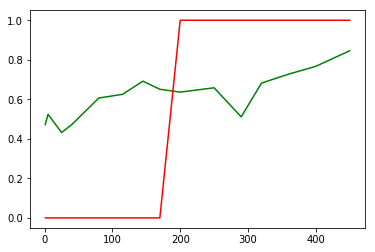

Working on... AVGO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


138.94954943731375
Window: 1
[[ 50 538]
 [ 42 535]]
F1,score 0.6484848484848484
Accuracy: 0.5021459227467812
10000.0
Window: 5
[[170 400]
 [171 423]]
F1,score 0.5970359915314043
Accuracy: 0.5094501718213058
4.39397056076079
Window: 25
[[ 45 553]
 [ 32 530]]
F1,score 0.6443768996960486
Accuracy: 0.4956896551724138
1.637893706954064
Window: 40
[[  8 545]
 [  0 604]]
F1,score 0.6891043924700514
Accuracy: 0.5289541918755402
10000.0
Window: 80
[[160 430]
 [ 75 484]]
F1,score 0.6571622539035982
Accuracy: 0.5604873803307223
1.0
Window: 115
[[  7 581]
 [  0 554]]
F1,score 0.6560094730609829
Accuracy: 0.4912434325744308
0.3593813663804626
Window: 145
[[ 19 587]
 [  0 530]]
F1,score 0.6435944140862174
Accuracy: 0.48327464788732394
0.3593813663804626
Window: 170
[[ 55 540]
 [  0 536]]
F1,score 0.6650124069478908
Accuracy: 0.5225464190981433
7.196856730011519
Window: 200
[[ 53 556]
 [  0 516]]
F1,score 0.649874055415617
Accuracy: 0.5057777777777778
0.3593813663804626
Window: 250
[[137 461]
 [ 24 4

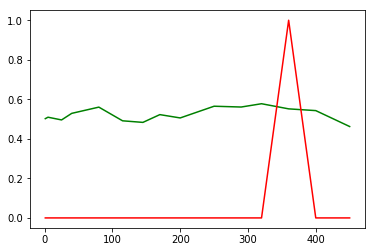

Working on... PYPL
0.3593813663804626
Window: 1
[[342 206]
 [359 258]]
F1,score 0.4773358001850139
Accuracy: 0.5150214592274678
0.005994842503189409
Window: 5
[[374 177]
 [381 232]]
F1,score 0.45401174168297453
Accuracy: 0.520618556701031
0.046415888336127774
Window: 25
[[289 220]
 [370 281]]
F1,score 0.48784722222222227
Accuracy: 0.49137931034482757
7.196856730011519
Window: 40
[[267 253]
 [304 333]]
F1,score 0.5445625511038429
Accuracy: 0.5185825410544511
1.637893706954064
Window: 80
[[411 183]
 [379 176]]
F1,score 0.38512035010940915
Accuracy: 0.5108790252393386
0.3593813663804626
Window: 115
[[475  18]
 [622  27]]
F1,score 0.07780979827089338
Accuracy: 0.4395796847635727
10000.0
Window: 145
[[293 146]
 [390 307]]
F1,score 0.5339130434782609
Accuracy: 0.528169014084507
10000.0
Window: 170
[[357 120]
 [333 321]]
F1,score 0.5863013698630137
Accuracy: 0.5994694960212201
10000.0
Window: 200
[[390  99]
 [281 355]]
F1,score 0.6513761467889908
Accuracy: 0.6622222222222223
10000.0
Window: 2

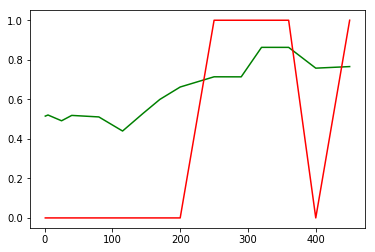

Working on... GILD


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


2.6826957952797255
Window: 1
[[  0 588]
 [  3 574]]
F1,score 0.6601495112133411
Accuracy: 0.4927038626609442
7.196856730011519
Window: 5
[[  1 583]
 [  0 580]]
F1,score 0.6655192197360872
Accuracy: 0.4991408934707904
0.3593813663804626
Window: 25
[[  3 605]
 [  0 552]]
F1,score 0.6459918080748975
Accuracy: 0.47844827586206895
0.3593813663804626
Window: 40
[[ 48 532]
 [ 20 557]]
F1,score 0.6686674669867947
Accuracy: 0.5229040622299049
0.3593813663804626
Window: 80
[[  0 568]
 [  0 581]]
F1,score 0.6716763005780347
Accuracy: 0.5056570931244561
0.3593813663804626
Window: 115
[[  0 622]
 [  0 520]]
F1,score 0.6257521058965102
Accuracy: 0.4553415061295972
1.0
Window: 145
[[  8 636]
 [  0 492]]
F1,score 0.6074074074074074
Accuracy: 0.44014084507042256
0.0001
Window: 170
[[639  39]
 [196 257]]
F1,score 0.6862483311081442
Accuracy: 0.7922192749778957
0.005994842503189409
Window: 200
[[688   2]
 [211 224]]
F1,score 0.6777609682299546
Accuracy: 0.8106666666666666
10000.0
Window: 250
[[296 447]
 

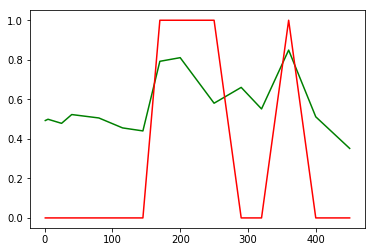

Working on... COST


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 1
[[385 183]
 [399 198]]
F1,score 0.40490797546012264
Accuracy: 0.5004291845493563
84.83428982440716
Window: 5
[[490  60]
 [551  63]]
F1,score 0.17096336499321574
Accuracy: 0.47508591065292094
1000.0
Window: 25
[[363 139]
 [484 174]]
F1,score 0.3583934088568486
Accuracy: 0.46293103448275863
1291.5496650148827
Window: 40
[[418  92]
 [506 141]]
F1,score 0.3204545454545455
Accuracy: 0.48314606741573035
0.000774263682681127
Window: 80
[[415  56]
 [478 200]]
F1,score 0.4282655246252677
Accuracy: 0.5352480417754569
0.046415888336127774
Window: 115
[[423  23]
 [587 109]]
F1,score 0.2632850241545893
Accuracy: 0.4658493870402802
0.3593813663804626
Window: 145
[[374   0]
 [762   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.32922535211267606
0.3593813663804626
Window: 170
[[365   0]
 [766   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.32272325375773653
0.046415888336127774
Window: 200
[[341   0]
 [784   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.3031111111111111
31.622776601683793
Window: 250
[[301  15]
 [698 101]]
F1,score 0.22076502732240438
Accuracy: 0.36053811659192825
0.3593813663804626
Window: 290
[[330   0]
 [777   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.2981029810298103
31.622776601683793
Window: 320
[[312   0]
 [785   4]]
F1,score 0.01008827238335435
Accuracy: 0.28701180744777477
10000.0
Window: 360
[[215  60]
 [713 105]]
F1,score 0.21363173957273654
Accuracy: 0.292772186642269
10000.0
Window: 400
[[187  37]
 [764  97]]
F1,score 0.1949748743718593
Accuracy: 0.26175115207373273
21.54434690031882
Window: 450
[[256  15]
 [778  26]]
F1,score 0.06153846153846154
Accuracy: 0.26232558139534884
[0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 25, 50, 50, 50]
[0.5004291845493563, 0.47508591065292094, 0.46293103448275863, 0.48314606741573035, 0.5352480417754569, 0.4658493870402802, 0.32922535211267606, 0.32272325375773653, 0.3031111111111111, 0.36053811659192825, 0.2981029810298103, 0.28701180744777477, 0.292772186642269, 0.26175115207373273, 0.26232558139534884]
accuracy
accuracy


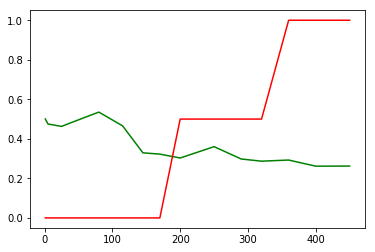

Working on... QCOM
166.81005372000558
Window: 1
[[262 314]
 [239 350]]
F1,score 0.5586592178770949
Accuracy: 0.5253218884120172
138.94954943731375
Window: 5
[[245 298]
 [234 387]]
F1,score 0.5926493108728942
Accuracy: 0.5429553264604811
1000.0
Window: 25
[[131 371]
 [163 495]]
F1,score 0.6496062992125985
Accuracy: 0.5396551724137931
51.7947467923121
Window: 40
[[ 60 452]
 [112 533]]
F1,score 0.6539877300613497
Accuracy: 0.5125324114088159
7.196856730011519
Window: 80
[[  0 439]
 [  1 709]]
F1,score 0.7631862217438105
Accuracy: 0.6170583115752829
4.39397056076079
Window: 115
[[  5 431]
 [  0 706]]
F1,score 0.7661421595225175
Accuracy: 0.6225919439579685
11.787686347935873
Window: 145
[[ 16 440]
 [ 49 631]]
F1,score 0.7207310108509424
Accuracy: 0.5695422535211268
0.0001
Window: 170
[[ 70 431]
 [155 475]]
F1,score 0.6184895833333334
Accuracy: 0.4818744473916888
0.3593813663804626
Window: 200
[[ 17 526]
 [  0 582]]
F1,score 0.6887573964497042
Accuracy: 0.5324444444444445
0.3593813663804626

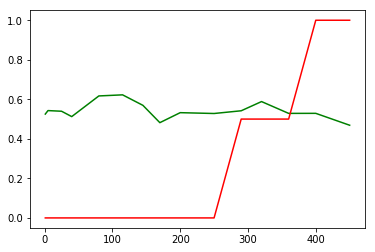

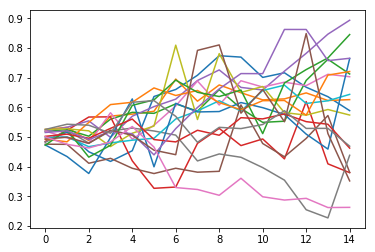

In [20]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
inbalancinglist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    inbalance=[]
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[1,5,25,40,80,115,145,170,200,250,290,320,360,400,450]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm
        inbalance.append(totu)
        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    inbalancinglist.append(inbalance)
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [16]:
tempacc=f1scoreresults
tempbalance=inbalancinglist

[0.48206824 0.4866436  0.49858306 0.50576754 0.51480435 0.55635317
 0.56716318 0.56700488 0.61871089 0.65795565 0.6487578  0.61293049
 0.6283338  0.63336293 0.59073302]
[ 0.          0.          0.          0.          0.          0.
  1.38888889  2.77777778  8.33333333 16.66666667 18.05555556 23.61111111
 29.16666667 37.5        36.11111111]


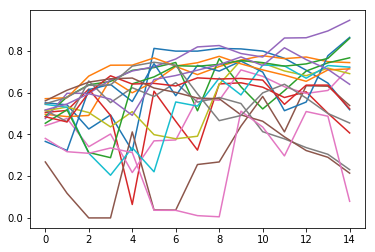

In [17]:
import operator
t=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
b=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    b=np.add(b,tempbalance[i])
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
print(b/len(tempbalance))
plt.show()

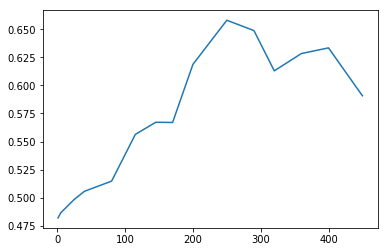

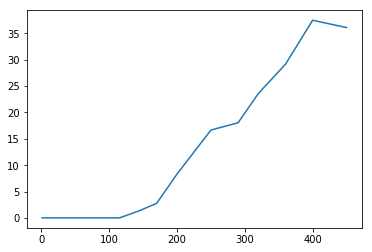

In [13]:
plt.plot(trendwindowtime,t/len(tempacc))
#normalized=normalize((b/len(tempbalance)).reshape(1, -1),axis=0,norm='max')

plt.show()
plt.plot(trendwindowtime,b/len(tempbalance))
plt.show()